# What do reactions to the 2023 Barbie movie reveal about public opinion on gender issues?

## Introduction
The 2023 Barbie movie by Greta Gerwig, which explores themes of feminism, empowerment and self-acceptance, has provoked fierce debate on gender-related issues. The film has highlighted the diverse and often polar perspectives on these themes through its questioning of societal norms and stereotypes. 

This project seeks to utilise the vast public conversation produced from the films release, to learn more about the public opinion on gender issues. NLP analysis including sentiment analysis and topic modelling, will be performed on a corpus of Reddit post comments. 

## Setting up the notebook
Setting up the notebook is the crucial first step, and ensures I have the libraries and tools required for data collection, processing and initial analysis. Short descriptions have been embedded in the below code cell to explain the functions of each tool.

In [2]:
import nltk ## natural language toolkit
nltk.download('punkt') ##tokenizer that divides a text into a list of sentences
nltk.download('wordnet') ##lexical database of english, finds relationships between words like synonyms, antonyms etc
nltk.download('stopwords') ##tool that elimates words that are widely used such as 'the', 'a' and 'in'

from nltk.corpus import stopwords ##disregards widely used words that provide little meaning
stops = set(stopwords.words('english'))

from nltk.stem import WordNetLemmatizer ##looks for lemmas of words from the wordnet database, returning the word in base form
lemmatizer = WordNetLemmatizer()

from nltk import stem ##removes morphological affixes from words, leaving only the word stem
stemmer = stem.PorterStemmer()

from nltk import word_tokenize ##splits a given sentence into words

import string ##module that provides tools to work with strings
punct = list(string.punctuation) ##list containing all punctuation characters

import requests ##library for making http requests
import pandas as pd ##library for data analysis
import numpy as np ##library for fundamental python programming
import datetime ##tool for working with dates and times
import matplotlib.pyplot as plt ##library for graph plotting and visualisation
import seaborn as sns ##library for data visualisation based on matplotlib
sns.set()

!pip install PRAW
import praw ##python reddit api wrapper (allows access to reddit's api)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\charl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data collection
Reddit is an online forum and its free API allows you to scrape data from its posts, such as obtaining the text of the comment, the subreddit it comes under and the date it was posted. I have chosen to perform analysis on Reddit comments as the data collection process is simple, and Reddit as a platform gains large public attraction which will ensure a sizeable corpus. 

On the Reddit website I searched for 'Barbie Movie' and filtered the results by 'Most Comments' and 'All Time'. I selected the first 8 posts that focused on discussions about the Barbie movie, disregarding posts that were unrelated. Using the created function 'submission', I was able to scrape the data from these 8 posts and then concatenate this data to form a combined larger dataset, which was then stored in csv from for ease. This produced my corpus of data with 7,522 comments.

In [3]:
reddit = praw.Reddit(user_agent='VAD',
                     client_id='rf2nevfPWH1MEOpry842hA', client_secret="pTvbdBbKSbLUvIh4IbEMsz4RW96VpQ",
                     username='pr0blems0lver15', password='YuMYuMs33!')

In [4]:
def submission(submission_id): 
    try:
        submission = reddit.submission(url = submission_id)
    except:
        submission = reddit.submission(submission_id)
    title = submission.title
    submission.comments.replace_more()
    text = [i.body for i in submission.comments]
    score = [i.score for i in submission.comments]
    user = [i.author for i in submission.comments]
    date = [datetime.datetime.fromtimestamp(i.created) for i in submission.comments]
    df = pd.DataFrame()
    df['text'] = text
    df['datetime'] = date
    df['score'] = score
    df['subreddit'] = submission.subreddit
    df['redditor'] = user
    df['type'] = 'comment'
    df['title'] = title
    df = df.sort_values('score', ascending = False).reset_index(drop = True)
    return df

In [5]:
## don't run this cell it will take a long time!!!

data1 = submission('https://www.reddit.com/r/movies/comments/155afzv/official_discussion_barbie_spoilers/')

data2 = submission('https://www.reddit.com/r/AskMen/comments/157gdyk/men_who_have_watched_barbie_what_did_you_think/')

data3 = submission('https://www.reddit.com/r/movies/comments/19cro5j/the_barbie_movies_unexpected_message_for_men/')

data4 = submission('https://www.reddit.com/r/TwoXChromosomes/comments/1799rqs/women_who_disliked_the_barbie_movie_why/')

data5 = submission('https://www.reddit.com/r/TrueFilm/comments/156zt07/the_barbie_movie_to_me_seemed_to_be_supportive/')

data6 = submission('https://www.reddit.com/r/TrueFilm/comments/158thxd/is_the_message_of_barbie_2023_going_over/')

data7 = submission('https://www.reddit.com/r/facepalm/comments/15azjti/is_the_barbie_movie_really_that_inappropriate_in/')

data8 = submission('https://www.reddit.com/r/movies/comments/13rll7o/barbie_main_trailer/')

In [13]:
## don't run this cell!!!

combined_data = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8], axis = 0)
combined_data.to_csv("combined_data.csv")

In [15]:
corpus = pd.read_csv('combined_data.csv', index_col = 0)
corpus

,text,datetime,score,subreddit,redditor,type,title
0,"“To be honest, once I found out horses have ve...",2023-07-21 03:38:04,9398,movies,Westtexasbizbot,comment,Official Discussion - Barbie [SPOILERS]
1,SUBLIME,2023-07-21 03:16:22,6618,movies,diabetesdavid,comment,Official Discussion - Barbie [SPOILERS]
2,"Everyone who doubted Ryan Gosling, or called h...",2023-07-21 03:12:49,6597,movies,SavageWolfe98,comment,Official Discussion - Barbie [SPOILERS]
3,That Ken war sequence that was half battle/hal...,2023-07-21 04:11:43,6424,movies,MondayAssasin,comment,Official Discussion - Barbie [SPOILERS]
4,I fucking lost it when Barbie (Margot Robbie) ...,2023-07-21 12:22:49,6238,movies,WyngZero,comment,Official Discussion - Barbie [SPOILERS]
...,...,...,...,...,...,...,...
759,"Piss off Hollywood, you're drunk",2023-05-25 17:59:46,-7,movies,Orodruin666,comment,Barbie | Main Trailer
760,This unironically looks like peak cinema,2023-05-25 17:35:42,-8,movies,Daydream_machine,comment,Barbie | Main Trailer
761,President Joe Biden Released a statement follo...,2023-05-25 18:08:08,-8,movies,No_Gur6255,comment,Barbie | Main Trailer
762,This looks stupid career ended for Margot and ...,2023-05-25 17:30:06,-16,movies,WrongDistribution307,comment,Barbie | Main Trailer


## Data processing
I first made sure that all the text was in string format before performing my function 'lemma'. The function first tokenizes the Reddit comments, which splits the text into a list of words called 'tokens'. It then lemmatizes these tokens and returns the base form of the word. The tokens are converted into lowercase and cleaned of stopwords and punctuation, producing a cleaned 'words' column in my corpus. The last step was resetting the index on the dataframe to prevent problems later on.

In [97]:
corpus['text'] = [str(i) for i in corpus['text']]
text = corpus['text']

In [98]:
def lemma(text):
    tokens = word_tokenize(text)
    lemmas = [lemmatizer.lemmatize(i.lower()) for i in tokens]
    lemmas = [i for i in lemmas if i not in stops and i not in punct]
    return lemmas

lemmas = [lemma(i) for i in (text)]

In [99]:
corpus['words'] = lemmas
corpus

,text,datetime,score,subreddit,redditor,type,title,words
0,"“To be honest, once I found out horses have ve...",2023-07-21 03:38:04,9398,movies,Westtexasbizbot,comment,Official Discussion - Barbie [SPOILERS],"[“, honest, found, horse, little, patriarchy, ..."
1,SUBLIME,2023-07-21 03:16:22,6618,movies,diabetesdavid,comment,Official Discussion - Barbie [SPOILERS],[sublime]
2,"Everyone who doubted Ryan Gosling, or called h...",2023-07-21 03:12:49,6597,movies,SavageWolfe98,comment,Official Discussion - Barbie [SPOILERS],"[everyone, doubted, ryan, gosling, called, old..."
3,That Ken war sequence that was half battle/hal...,2023-07-21 04:11:43,6424,movies,MondayAssasin,comment,Official Discussion - Barbie [SPOILERS],"[ken, war, sequence, wa, half, battle/half, mu..."
4,I fucking lost it when Barbie (Margot Robbie) ...,2023-07-21 12:22:49,6238,movies,WyngZero,comment,Official Discussion - Barbie [SPOILERS],"[fucking, lost, barbie, margot, robbie, wa, cr..."
...,...,...,...,...,...,...,...,...
7517,"Piss off Hollywood, you're drunk",2023-05-25 17:59:46,-7,movies,Orodruin666,comment,Barbie | Main Trailer,"[piss, hollywood, 're, drunk]"
7518,This unironically looks like peak cinema,2023-05-25 17:35:42,-8,movies,Daydream_machine,comment,Barbie | Main Trailer,"[unironically, look, like, peak, cinema]"
7519,President Joe Biden Released a statement follo...,2023-05-25 18:08:08,-8,movies,No_Gur6255,comment,Barbie | Main Trailer,"[president, joe, biden, released, statement, f..."
7520,This looks stupid career ended for Margot and ...,2023-05-25 17:30:06,-16,movies,WrongDistribution307,comment,Barbie | Main Trailer,"[look, stupid, career, ended, margot, ryan, po..."


In [101]:
corpus.reset_index(drop=True, inplace=True)
corpus

,text,datetime,score,subreddit,redditor,type,title,words
0,"“To be honest, once I found out horses have ve...",2023-07-21 03:38:04,9398,movies,Westtexasbizbot,comment,Official Discussion - Barbie [SPOILERS],"[“, honest, found, horse, little, patriarchy, ..."
1,SUBLIME,2023-07-21 03:16:22,6618,movies,diabetesdavid,comment,Official Discussion - Barbie [SPOILERS],[sublime]
2,"Everyone who doubted Ryan Gosling, or called h...",2023-07-21 03:12:49,6597,movies,SavageWolfe98,comment,Official Discussion - Barbie [SPOILERS],"[everyone, doubted, ryan, gosling, called, old..."
3,That Ken war sequence that was half battle/hal...,2023-07-21 04:11:43,6424,movies,MondayAssasin,comment,Official Discussion - Barbie [SPOILERS],"[ken, war, sequence, wa, half, battle/half, mu..."
4,I fucking lost it when Barbie (Margot Robbie) ...,2023-07-21 12:22:49,6238,movies,WyngZero,comment,Official Discussion - Barbie [SPOILERS],"[fucking, lost, barbie, margot, robbie, wa, cr..."
...,...,...,...,...,...,...,...,...
7517,"Piss off Hollywood, you're drunk",2023-05-25 17:59:46,-7,movies,Orodruin666,comment,Barbie | Main Trailer,"[piss, hollywood, 're, drunk]"
7518,This unironically looks like peak cinema,2023-05-25 17:35:42,-8,movies,Daydream_machine,comment,Barbie | Main Trailer,"[unironically, look, like, peak, cinema]"
7519,President Joe Biden Released a statement follo...,2023-05-25 18:08:08,-8,movies,No_Gur6255,comment,Barbie | Main Trailer,"[president, joe, biden, released, statement, f..."
7520,This looks stupid career ended for Margot and ...,2023-05-25 17:30:06,-16,movies,WrongDistribution307,comment,Barbie | Main Trailer,"[look, stupid, career, ended, margot, ryan, po..."


In [102]:
corpus.index

RangeIndex(start=0, stop=7522, step=1)

## Initial analysis
Once I had calculated the mean VAD scores for the 'words' in my corpus and concatenated these dataframes into a new dataset, I began some basic inital analysis. For example, calculating the mean VAD scores across the entire dataset, locating the highest VAD scores and producing some inital visualisations.

### Sentiment analysis

In [45]:
vad = pd.read_excel('vad.xlsx', index_col = 0)

vad_ = []

c = [np.nan for i in range(len(vad.columns))]

for i in corpus['words']:
    words = [j for j in i if j in vad.index]
    vad_1 = []
    for k in words:
        try:
            vad_1.append(vad.loc[k])
        except:
            vad_1.append(c)
    vad_df = pd.DataFrame(vad_1, columns = [i for i in vad.columns])
    vad_.append(vad_df.mean())
        

vad_ = pd.DataFrame(vad_)
vad_

,valence,arousal,dominance
0,0.640382,0.490673,0.555016
1,NaN,NaN,NaN
2,0.656396,0.550091,0.571602
3,0.601765,0.550314,0.596885
4,0.465942,0.509530,0.507842
...,...,...,...
7517,NaN,NaN,NaN
7518,0.652453,0.564108,0.663430
7519,0.406542,0.573756,0.412621
7520,0.591268,0.592732,0.592233


In [46]:
vad_.index

RangeIndex(start=0, stop=7522, step=1)

In [47]:
dataset = pd.concat([corpus, vad_], axis = 1)
dataset

,text,datetime,score,subreddit,redditor,type,title,words,valence,arousal,dominance
0,"“To be honest, once I found out horses have ve...",2023-07-21 03:38:04,9398,movies,Westtexasbizbot,comment,Official Discussion - Barbie [SPOILERS],"[“, honest, found, horse, little, patriarchy, ...",0.640382,0.490673,0.555016
1,SUBLIME,2023-07-21 03:16:22,6618,movies,diabetesdavid,comment,Official Discussion - Barbie [SPOILERS],[sublime],NaN,NaN,NaN
2,"Everyone who doubted Ryan Gosling, or called h...",2023-07-21 03:12:49,6597,movies,SavageWolfe98,comment,Official Discussion - Barbie [SPOILERS],"[everyone, doubted, ryan, gosling, called, old...",0.656396,0.550091,0.571602
3,That Ken war sequence that was half battle/hal...,2023-07-21 04:11:43,6424,movies,MondayAssasin,comment,Official Discussion - Barbie [SPOILERS],"[ken, war, sequence, wa, half, battle/half, mu...",0.601765,0.550314,0.596885
4,I fucking lost it when Barbie (Margot Robbie) ...,2023-07-21 12:22:49,6238,movies,WyngZero,comment,Official Discussion - Barbie [SPOILERS],"[fucking, lost, barbie, margot, robbie, wa, cr...",0.465942,0.509530,0.507842
...,...,...,...,...,...,...,...,...,...,...,...
7517,"Piss off Hollywood, you're drunk",2023-05-25 17:59:46,-7,movies,Orodruin666,comment,Barbie | Main Trailer,"[piss, hollywood, 're, drunk]",NaN,NaN,NaN
7518,This unironically looks like peak cinema,2023-05-25 17:35:42,-8,movies,Daydream_machine,comment,Barbie | Main Trailer,"[unironically, look, like, peak, cinema]",0.652453,0.564108,0.663430
7519,President Joe Biden Released a statement follo...,2023-05-25 18:08:08,-8,movies,No_Gur6255,comment,Barbie | Main Trailer,"[president, joe, biden, released, statement, f...",0.406542,0.573756,0.412621
7520,This looks stupid career ended for Margot and ...,2023-05-25 17:30:06,-16,movies,WrongDistribution307,comment,Barbie | Main Trailer,"[look, stupid, career, ended, margot, ryan, po...",0.591268,0.592732,0.592233


In [95]:
dataset['valence'].mean()

0.6307055451699524

In [93]:
dataset['arousal'].mean()

0.5348613278880371

In [94]:
dataset['dominance'].mean()

0.6136237847825599

In [103]:
dataset['valence'].idxmax()

1758

In [104]:
dataset.iloc[1758]

text         I am in love with (patriarchy-bringer) Ken. Th...
datetime                                   2023-07-22 13:29:52
score                                                        6
subreddit                                               movies
redditor                                                Razik_
type                                                   comment
title                  Official Discussion - Barbie [SPOILERS]
words                      [love, patriarchy-bringer, ken, 's]
valence                                               0.971963
arousal                                               0.757719
dominance                                             0.684466
Name: 1758, dtype: object

In [105]:
dataset['arousal'].idxmax()

3655

In [106]:
dataset.iloc[3655]

text                             It was boring as fuck
datetime                           2023-10-17 05:36:35
score                                                1
subreddit                              TwoXChromosomes
redditor                               CranberryNo1448
type                                           comment
title        Women who disliked the Barbie movie, why?
words                               [wa, boring, fuck]
valence                                       0.569819
arousal                                       0.993139
dominance                                     0.650485
Name: 3655, dtype: object

In [107]:
dataset['dominance'].idxmax()

6994

In [108]:
dataset.iloc[6994]

text            Cautiously optimistic
datetime          2023-05-26 10:01:14
score                               2
subreddit                      movies
redditor         PM_ME_WHT_PHOSPHORUS
type                          comment
title           Barbie | Main Trailer
words        [cautiously, optimistic]
valence                      0.766355
arousal                      0.761578
dominance                    0.932039
Name: 6994, dtype: object

C:\Users\charl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


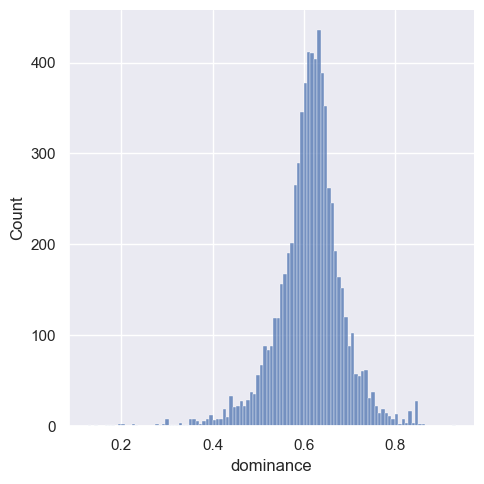

In [109]:
sns.displot(dataset['dominance'])

C:\Users\charl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


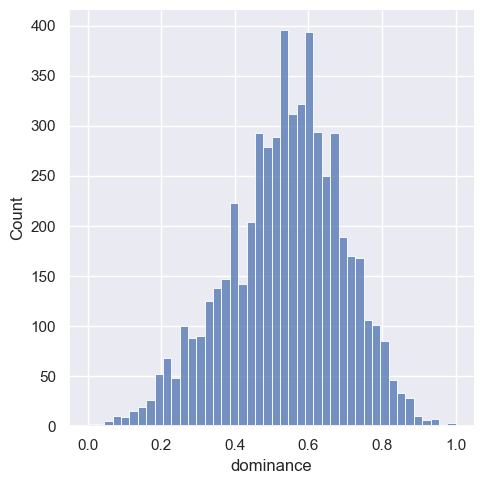

In [110]:
sns.displot(vad['dominance'])

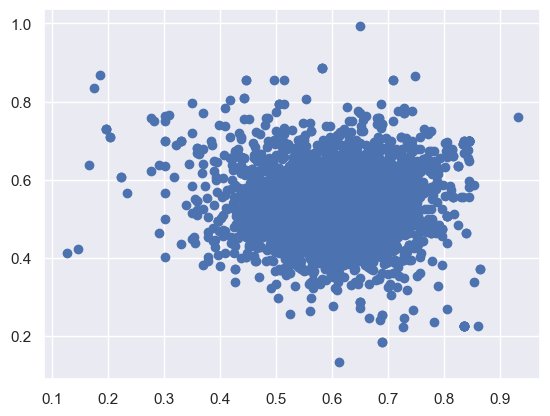

In [112]:
plt.scatter((dataset['dominance']), (dataset['arousal']))

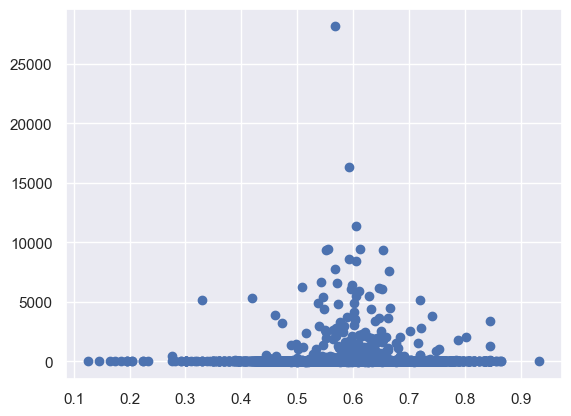

In [113]:
plt.scatter((dataset['dominance']), (dataset['score']))

In [89]:
dataset['score'].idxmax()

4008

In [90]:
dataset.iloc[4008]

text         Idk, I watched Simpsons growing up and I didn'...
datetime                                   2023-07-27 13:10:55
score                                                    28177
subreddit                                             facepalm
redditor                                                   NaN
type                                                   comment
title        Is the Barbie movie really that inappropriate ...
words        [idk, watched, simpson, growing, n't, understa...
valence                                               0.716511
arousal                                               0.632832
dominance                                             0.566748
Name: 4008, dtype: object

## Next steps
My next steps for future analysis will include conducting topic modelling to discover recurring themes and topics discussed in the comments. This can reveal what aspects of the movie resonate most with the audience, what concerns they have, and what interpretations they are forming. I also aim to compare the topics identified across the different discussion threads to see if there are any variations in focus or perspective. Moving on from this, I will combine topic modelling with sentiment analysis to understand the overall sentiment towards each topic. This can reveal what aspects of the movie generate positive, negative or neutral reactions and can analyze how sentiment varies within individual topics based on specific keywords or phrases used.